# ¡Bienvenido a Pipelines!

La biblioteca de transformadores HuggingFace proporciona API en dos niveles diferentes.

La API de alto nivel para usar modelos de código abierto para tareas de inferencia típicas se llama "pipelines". Es increíblemente fácil de usar.

Se crea una tubería usando algo como:

`my_pipeline = pipeline("tarea_que_quiero_hacer")`

Seguido por

`result = my_pipeline(mi_resultado)`

¡Y eso es todo!

Consulta el final de este laboratorio colaborativo para obtener una lista de todas las tuberías.

## Nota al margen:

Puede que ya sepas esto, pero por si no estás familiarizado con la palabra "inferencia" que utilizo aquí:

Al trabajar con modelos de ciencia de datos, puedes estar llevando a cabo 2 actividades muy diferentes: **entrenamiento** e **inferencia**.

### 1. Entrenamiento

**Entrenamiento** es cuando le proporcionas a un modelo datos para que se adapte y mejore en una tarea en el futuro. Esto se hace actualizando sus configuraciones internas: los parámetros o pesos del modelo. Si estás entrenando un modelo que ya ha tenido algo de entrenamiento, la actividad se llama "ajuste fino".

### 2. Inferencia

**Inferencia** es cuando estás trabajando con un modelo que ya ha sido entrenado_. Estás usando ese modelo para producir nuevos resultados a partir de nuevas entradas, aprovechando todo lo que aprendió mientras se entrenaba. A la inferencia también se la conoce a veces como "Ejecución" o "Ejecución de un modelo".

Todo el uso que hemos hecho de las API para GPT, Claude y Gemini en las últimas semanas son ejemplos de **inferencia**. La "P" de GPT significa "preentrenado", lo que significa que ya se ha entrenado con datos (¡muchos!). En la semana 6, intentaremos ajustar GPT nosotros mismos.

La API de pipelines en HuggingFace solo se utiliza para **inferencia**: ejecutar un modelo que ya se ha entrenado. En la semana 7, entrenaremos nuestro propio modelo y necesitaremos utilizar las API más avanzadas de HuggingFace que veremos en la próxima conferencia.

In [1]:
!pip install -q transformers datasets diffusers

In [2]:
# Imports

import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

# Nota importante

No mencioné esto en la conferencia, pero es posible que debas iniciar sesión en el centro de HuggingFace si no lo has hecho antes.

1. Si aún no lo has hecho, crea una cuenta de HuggingFace **gratuita** en https://huggingface.co y navega a Configuración desde el menú de usuario en la parte superior derecha. Luego, crea un nuevo token de API y obtén permisos de escritura.

2. De regreso aquí en colab, presiona el ícono de "llave" en el panel lateral a la izquierda y agrega un nuevo secreto:
En el campo de nombre, coloca `HF_TOKEN`
En el campo de valor, coloca tu token actual: `hf_...`
Asegúrate de que el interruptor de acceso al cuaderno esté encendido.

3. Ejecuta la celda a continuación para iniciar sesión. Deberás hacer esto en cada uno de tus colabs. Es una forma realmente útil de administrar tus secretos sin necesidad de escribirlos en colab. También hay un atajo para sobrescribir la línea que aparece a continuación con:
`hf_token = "hf_...."`
Pero esta no es una buena práctica, ya que deberás tener cuidado de no compartir el colab. ¡Y una de las mejores cosas de los colabs es que puedes compartirlos!

In [4]:
hf_token = userdata.get('HUGGINGFACE_API_KEY')
login(hf_token, add_to_git_credential=True)

In [5]:
# Sentiment Analysis

classifier = pipeline("sentiment-analysis", device="cuda")
result = classifier("¡Estoy súper emocionado de estar en camino hacia la maestría en LLM!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.8974964022636414}]


In [6]:
# Named Entity Recognition

ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Barack Obama fue el 44º presidente de los Estados Unidos.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99767464), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'ORG', 'score': np.float32(0.9285247), 'word': 'los Estados Unidos', 'start': 38, 'end': 56}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [7]:
# Question Answering con Context

question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(question="¿Quién fue el 44º presidente de los Estados Unidos?",
                           context="Barack Obama fue el 44º presidente de los Estados Unidos.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.9315174221992493, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [8]:
# Text Summarization

summarizer = pipeline("summarization", device="cuda")
text = """La biblioteca de transformadores Hugging Face es una herramienta increíblemente versátil y poderosa para el procesamiento del lenguaje natural (PLN).
Permite a los usuarios realizar una amplia gama de tareas, como la clasificación de texto, el reconocimiento de entidades con nombre y la respuesta a preguntas, entre otras.
Es una biblioteca extremadamente popular que se usa ampliamente en la comunidad de ciencia de datos de código abierto.
Reduce la barrera de entrada al campo al proporcionar a los científicos de datos una forma productiva y conveniente de trabajar con modelos de transformadores.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


 Hugging Face is a herramienta versátil y poderosa para el procesamiento del lenguaje natural (PLN) Permite a los usuarios realizar una gama


In [9]:
# Translation

translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("Data Scientists were amazed by the power and simplicity of the API of pipelines from HuggingFace.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


Les chercheurs en données ont été étonnés par la puissance et la simplicité de l'API des pipelines de HuggingFace.


In [10]:
# Classification

classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier("¡La librería de Transformers de Hugging Face es increíble!",
                    candidate_labels=["tecnología", "deporte", "política"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': '¡La librería de Transformers de Hugging Face es increíble!', 'labels': ['tecnología', 'deporte', 'política'], 'scores': [0.466916561126709, 0.4343045949935913, 0.09877880662679672]}


In [11]:
# Text Generation

generator = pipeline("text-generation", device="cuda")
result = generator("Si hay algo que quiero que recuerdes sobre el uso de los pipelines de HuggingFace, es")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Si hay algo que quiero que recuerdes sobre el uso de los pipelines de HuggingFace, es que esta no esta que de la casa de la guará de la lago que se pueden con leímado de donde la había de la que se la cosa de la cosa.

(4) Where the project is not in operation in the United States, the United States shall not grant to any entity in the United States any easements, rights, or approvals of land or other property in the United States for the construction, construction, or improvement of a pipeline within the meaning of section 12, or for any other purpose.

(5) Where the United States, or any State or any other entity, has, or is proposing to have, an easement or other right or benefit of any kind for the construction, construction, or improvement of a pipeline within the meaning of section 12, or for any other purpose, the United States shall not grant to any entity in the United States any easements, rights, or approvals of land or other property in the United States for the constructio

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

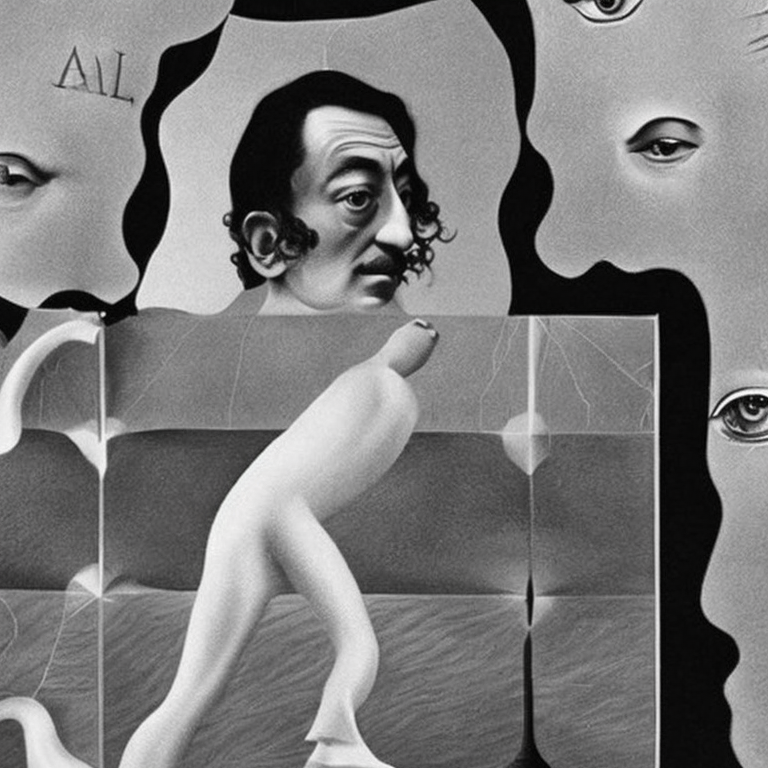

In [12]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "Una clase de científicos de datos aprendiendo sobre IA, al estilo surrealista de Salvador Dalí"
image = image_gen(prompt=text).images[0]
image

In [17]:
# Audio Generation

# SCRIPT MEJORADO PARA TEXT-TO-SPEECH
import torch
import soundfile as sf
from IPython.display import Audio
from transformers import pipeline

# Configurar dispositivo
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device set to use {device}")

# OPCIÓN 1: SpeechT5 con embedding sintético (MÁS CONFIABLE)
try:
    print("Cargando SpeechT5...")
    synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device=device)

    # Crear embedding sintético que funciona bien
    speaker_embedding = torch.randn(1, 512) * 0.1

    # Generar audio
    speech = synthesiser("¡Hola a un ingeniero en inteligencia artificial, en camino hacia la maestría!",
                        forward_params={"speaker_embeddings": speaker_embedding})

    # Guardar archivo
    sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
    print("✅ Audio generado exitosamente con SpeechT5")

    # Reproducir
    display(Audio("speech.wav"))

except Exception as e:
    print(f"❌ Error con SpeechT5: {e}")

    # OPCIÓN 2: FastSpeech2 (NOMBRE CORREGIDO)
    try:
        print("Cargando FastSpeech2...")
        # CORRECCIÓN: ljspeech (no ljspeec)
        synthesiser = pipeline("text-to-speech", "facebook/fastspeech2-en-ljspeech", device=device)

        # No necesita speaker embeddings
        speech = synthesiser("Hello to an artificial intelligence engineer, on the way to a master's degree!")

        sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
        print("✅ Audio generado exitosamente con FastSpeech2")

        display(Audio("speech.wav"))

    except Exception as e2:
        print(f"❌ Error con FastSpeech2: {e2}")

        # OPCIÓN 3: Modelos alternativos
        alternative_models = [
            "espnet/kan-bayashi_ljspeech_vits",
            "facebook/mms-tts-eng",
            "suno/bark-small"
        ]

        for model_name in alternative_models:
            try:
                print(f"Probando {model_name}...")
                synthesiser = pipeline("text-to-speech", model_name, device=device)
                speech = synthesiser("Hello world!")
                sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
                print(f"✅ Éxito con {model_name}!")
                display(Audio("speech.wav"))
                break
            except Exception as e3:
                print(f"❌ Error con {model_name}: {e3}")
                continue

# MÉTODO ALTERNATIVO: Dataset original (SOLO EN COLAB SEGURO)
def load_original_embeddings():
    """⚠️ USAR SOLO EN GOOGLE COLAB ⚠️"""
    try:
        from datasets import load_dataset

        print("⚠️ Cargando dataset con trust_remote_code=True...")
        embeddings_dataset = load_dataset(
            "Matthijs/cmu-arctic-xvectors",
            split="validation",
            trust_remote_code=True
        )

        speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

        synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device=device)
        speech = synthesiser("¡Hola a un ingeniero en inteligencia artificial, en camino hacia la maestría!",
                            forward_params={"speaker_embeddings": speaker_embedding})

        sf.write("speech_original.wav", speech["audio"], samplerate=speech["sampling_rate"])
        print("✅ Audio con embeddings originales")
        display(Audio("speech_original.wav"))

    except Exception as e:
        print(f"❌ No se pudieron cargar embeddings originales: {e}")

# Descomentar la siguiente línea SOLO en Google Colab:
load_original_embeddings()

Device set to use cuda
Cargando SpeechT5...


Device set to use cuda


✅ Audio generado exitosamente con SpeechT5


`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'Matthijs/cmu-arctic-xvectors' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'Matthijs/cmu-arctic-xvectors' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


⚠️ Cargando dataset con trust_remote_code=True...
❌ No se pudieron cargar embeddings originales: Dataset scripts are no longer supported, but found cmu-arctic-xvectors.py


# Todos los pipelines disponibles

Aquí están todos los pipelines disponibles de Transformers y Diffusers.

¡Gracias al estudiante Lucky P por sugerirme que incluya esto!

Hay una lista de pipelines debajo de las Tareas en esta página (tienes que desplazarte un poco hacia abajo y luego expandir los parámetros para ver las Tareas):

https://huggingface.co/docs/transformers/main_classes/pipelines

También hay esta lista de Tareas para los modelos de Difusión en lugar de Transformadores, siguiendo el ejemplo de generación de imágenes donde uso DiffusionPipeline anterior.

https://huggingface.co/docs/diffusers/en/api/pipelines/overview

Si se te ocurren algunos ejemplos interesantes de otros pipelines, ¡compártelos conmigo! Es maravilloso cómo HuggingFace hace que esta funcionalidad avanzada de IA esté disponible para la inferencia con una API tan simple.